# 在mnist数据集上测试效果

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
Epoch 1/10
1500/1500 [========================================]  loss: 0.021761060063475373 valid accuracy:0.9166666666666666

Epoch 2/10
1500/1500 [========================================]  loss: 0.011305827056304391 valid accuracy:0.9320833333333334

Epoch 3/10
1500/1500 [========================================]  loss: 0.009150930882309635 valid accuracy:0.9394166666666667

Epoch 4/10
1500/1500 [========================================]  loss: 0.007813214083510064 valid accuracy:0.94725

Epoch 5/10
1500/1500 [========================================]  loss: 0.006864178776069729 valid accuracy:0.95125

Epoch 6/10
1500/1500 [========================================]  loss: 0.006146259728414321 valid accuracy:0.9533333333333334

Epoch 7/10
1500/1500 [========================================]  loss: 0.005571454453823042 valid accuracy:0.95625

Epoch 8/10
1500/1500 [========================================]  loss: 0.005091155612549247 va

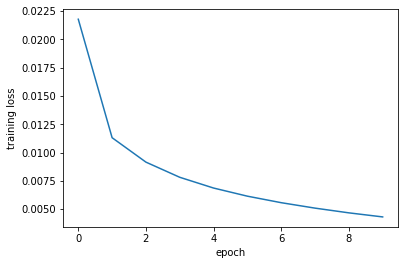

test accuracy:0.9637


In [4]:
from my_sequential import MyDenseLayer, MySequential
import tensorflow as tf
import numpy as np
from help_func import one_hot

# 加载训练集
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 数据预处理
np.random.seed(233)
np.random.shuffle(X_train)
np.random.seed(233)
np.random.shuffle(y_train)

X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test = X_train.reshape(
    len(X_train), -1), X_test.reshape(len(X_test), -1)
# 转换成独热码
y_train = one_hot(y_train, num_classes=10)
y_test = one_hot(y_test, num_classes=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 创建双隐藏层神经网络
model = MySequential(
    [MyDenseLayer(in_features=784, out_features=100, activation='relu', bias=True),
     MyDenseLayer(in_features=100, out_features=100,
                  activation='relu', bias=True),
     MyDenseLayer(in_features=100, out_features=10, activation='softmax', bias=True)])

# learning rate 学习率有甜点，这个数据集大概在0.1-0.3之间效果好
model.fit(X_train, y_train, epoch=10, batch_size=32,
          learning_rate=0.1, loss='mse', valid_spilt=0.2, sparse=False)
print('test', end=" ")
model.evaluate(X_test, y_test, sparse=False)


# Fashion Mnist数据集上测试

In [2]:
import copy
# 加载训练集
f_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = copy.deepcopy(f_mnist.load_data())
# 数据预处理
np.random.seed(233)
np.random.shuffle(X_train)
np.random.seed(233)
np.random.shuffle(y_train)

X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test = X_train.reshape(
    len(X_train), -1), X_test.reshape(len(X_test), -1)
# 转换成独热码
y_train = one_hot(y_train, num_classes=10)
y_test = one_hot(y_test, num_classes=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 创建双隐藏层神经网络
model = MySequential(
    [MyDenseLayer(in_features=784, out_features=100, activation='relu', bias=True),
     MyDenseLayer(in_features=100, out_features=100,
                  activation='relu', bias=True),
     MyDenseLayer(in_features=100, out_features=10, activation='softmax', bias=True)])

# learning rate 学习率有甜点，这个数据集大概在0.1-0.3之间效果好
model.fit(X_train, y_train, epoch=10, batch_size=32,
          learning_rate=0.1, loss='mse', valid_spilt=0.2, sparse=False)
print('test', end=" ")
model.evaluate(X_test, y_test, sparse=False)


# 鸢尾花数据集测试

In [ ]:
from sklearn import datasets
# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=None)


# 红酒数据集测试

In [ ]:
from sklearn import datasets
# 加载数据
wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=None)
